# ChatOllama

[Ollama](https://ollama.ai/) allows you to run open-source large language models, such as Llama 2, locally.

Ollama bundles model weights, configuration, and data into a single package, defined by a Modelfile. 

It optimizes setup and configuration details, including GPU usage.

For a complete list of supported models and model variants, see the [Ollama model library](https://github.com/jmorganca/ollama#model-library).

## Overview
### Integration details

| Class | Package | Local | Serializable | [JS support](https://js.langchain.com/v0.2/docs/integrations/chat/ollama) | Package downloads | Package latest |
| :--- | :--- | :---: | :---: |  :---: | :---: | :---: |
| [ChatOllama](https://python.langchain.com/v0.2/api_reference/ollama/chat_models/langchain_ollama.chat_models.ChatOllama.html) | [langchain-ollama](https://python.langchain.com/v0.2/api_reference/ollama/index.html) | ✅ | ❌ | ✅ | ![PyPI - Downloads](https://img.shields.io/pypi/dm/langchain-ollama?style=flat-square&label=%20) | ![PyPI - Version](https://img.shields.io/pypi/v/langchain-ollama?style=flat-square&label=%20) |

### Model features
| [Tool calling](/docs/how_to/tool_calling/) | [Structured output](/docs/how_to/structured_output/) | JSON mode | [Image input](/docs/how_to/multimodal_inputs/) | Audio input | Video input | [Token-level streaming](/docs/how_to/chat_streaming/) | Native async | [Token usage](/docs/how_to/chat_token_usage_tracking/) | [Logprobs](/docs/how_to/logprobs/) |
| :---: |:----------------------------------------------------:| :---: | :---: |  :---: | :---: | :---: | :---: | :---: | :---: |
| ✅ |                          ✅                           | ✅ | ❌ | ❌ | ❌ | ✅ | ✅ | ❌ | ❌ |

## Setup

First, follow [these instructions](https://github.com/jmorganca/ollama) to set up and run a local Ollama instance:

* [Download](https://ollama.ai/download) and install Ollama onto the available supported platforms (including Windows Subsystem for Linux)
* Fetch available LLM model via `ollama pull <name-of-model>`
    * View a list of available models via the [model library](https://ollama.ai/library)
    * e.g., `ollama pull llama3`
* This will download the default tagged version of the model. Typically, the default points to the latest, smallest sized-parameter model.

> On Mac, the models will be download to `~/.ollama/models`
> 
> On Linux (or WSL), the models will be stored at `/usr/share/ollama/.ollama/models`

* Specify the exact version of the model of interest as such `ollama pull vicuna:13b-v1.5-16k-q4_0` (View the [various tags for the `Vicuna`](https://ollama.ai/library/vicuna/tags) model in this instance)
* To view all pulled models, use `ollama list`
* To chat directly with a model from the command line, use `ollama run <name-of-model>`
* View the [Ollama documentation](https://github.com/jmorganca/ollama) for more commands. Run `ollama help` in the terminal to see available commands too.


If you want to get automated tracing of your model calls you can also set your [LangSmith](https://docs.smith.langchain.com/) API key by uncommenting below:

In [ ]:
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")
# os.environ["LANGSMITH_TRACING"] = "true"

### Installation

The LangChain Ollama integration lives in the `langchain-ollama` package:

In [ ]:
%pip install -qU langchain-ollama

Make sure you're using the latest Ollama version for structured outputs. Update by running:

In [ ]:
%pip install -U ollama

## Instantiation

Now we can instantiate our model object and generate chat completions:

- TODO: Update model instantiation with relevant params.

In [9]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llama3.1",
    temperature=0,
    # other params...
)

## Invocation

In [10]:
from langchain_core.messages import AIMessage

messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content='The translation of "I love programming" from English to French is:\n\n"J\'adore programmer."', response_metadata={'model': 'llama3.1', 'created_at': '2024-08-19T16:05:32.81965Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 2167842917, 'load_duration': 54222584, 'prompt_eval_count': 35, 'prompt_eval_duration': 893007000, 'eval_count': 22, 'eval_duration': 1218962000}, id='run-0863daa2-43bf-4a43-86cc-611b23eae466-0', usage_metadata={'input_tokens': 35, 'output_tokens': 22, 'total_tokens': 57})

In [11]:
print(ai_msg.content)

The translation of "I love programming" from English to French is:

"J'adore programmer."


## Chaining

We can [chain](/docs/how_to/sequence/) our model with a prompt template like so:

In [12]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "German",
        "input": "I love programming.",
    }
)

AIMessage(content='Das Programmieren ist mir ein Leidenschaft! (That\'s "Programming is my passion!" in German.) Would you like me to translate anything else?', response_metadata={'model': 'llama3.1', 'created_at': '2024-08-19T16:05:34.893548Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 2045997333, 'load_duration': 22584792, 'prompt_eval_count': 30, 'prompt_eval_duration': 213210000, 'eval_count': 32, 'eval_duration': 1808541000}, id='run-d18e1c6b-50e0-4b1d-b23a-973fa058edad-0', usage_metadata={'input_tokens': 30, 'output_tokens': 32, 'total_tokens': 62})

## Tool calling

We can use [tool calling](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) with an LLM [that has been fine-tuned for tool use](https://ollama.com/library/llama3.1): 

```
ollama pull llama3.1
```

Details on creating custom tools are available in [this guide](/docs/how_to/custom_tools/). Below, we demonstrate how to create a tool using the `@tool` decorator on a normal python function.

In [13]:
from typing import List

from langchain_core.tools import tool
from langchain_ollama import ChatOllama


@tool
def validate_user(user_id: int, addresses: List[str]) -> bool:
    """Validate user using historical addresses.

    Args:
        user_id (int): the user ID.
        addresses (List[str]): Previous addresses as a list of strings.
    """
    return True


llm = ChatOllama(
    model="llama3.1",
    temperature=0,
).bind_tools([validate_user])

result = llm.invoke(
    "Could you validate user 123? They previously lived at "
    "123 Fake St in Boston MA and 234 Pretend Boulevard in "
    "Houston TX."
)
result.tool_calls

[{'name': 'validate_user',
  'args': {'addresses': '["123 Fake St, Boston, MA", "234 Pretend Boulevard, Houston, TX"]',
   'user_id': '123'},
  'id': '40fe3de0-500c-4b91-9616-5932a929e640',
  'type': 'tool_call'}]

## Multi-modal

Ollama has support for multi-modal LLMs, such as [bakllava](https://ollama.com/library/bakllava) and [llava](https://ollama.com/library/llava).

    ollama pull bakllava

Be sure to update Ollama so that you have the most recent version to support multi-modal.


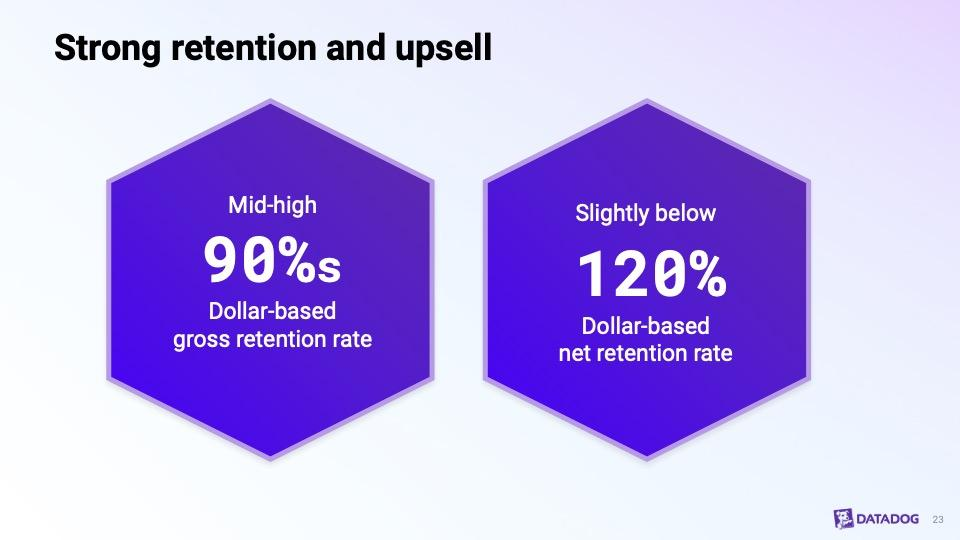

In [15]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "../../../static/img/ollama_example_img.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [16]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="bakllava", temperature=0)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "What is the Dollar-based gross retention rate?", "image": image_b64}
)

print(query_chain)

90%


## API reference

For detailed documentation of all ChatOllama features and configurations head to the API reference: https://python.langchain.com/api_reference/ollama/chat_models/langchain_ollama.chat_models.ChatOllama.html